In [64]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_customers = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/customers.csv")
df_products = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/products.csv")
df_transactions = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/Transactions.csv")

In [26]:
df_transactions = df_transactions['id_prod;date;session_id;client_id'].str.split(';', expand=True)
df_products = df_products['id_prod;price;categ'].str.split(';', expand=True)
df_customers = df_customers['client_id;sex;birth'].str.split(';', expand=True)

In [27]:
df_transactions.columns = ['id_prod', 'date', 'session_id', 'client_id']
df_products.columns = ['id_prod', 'price', 'categ']
df_customers.columns = ['client_id', 'sex', 'birth']

In [28]:
df_merged = pd.merge(df_products, df_transactions, on='id_prod', how='left')

In [29]:
df = pd.merge(df_merged, df_customers, on='client_id', how='inner')

In [30]:
df.head(2)

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967


In [31]:
# Nombre de transactions
df.shape

(687534, 8)

In [32]:
# Nombre de clients uniques
df['client_id'].nunique()

8600

In [52]:
# Nombre de produits uniques
df['id_prod'].nunique()

3265

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   price       687534 non-null  float64       
 2   categ       687534 non-null  object        
 3   date        687298 non-null  datetime64[ns]
 4   session_id  687534 non-null  object        
 5   client_id   687534 non-null  object        
 6   sex         687534 non-null  object        
 7   birth       687534 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 39.3+ MB


In [41]:
# Colonne date au format date
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.floor('d')

In [49]:
# Colonne birth au format date
df['birth'] = pd.to_datetime(df['birth'], errors='coerce')
df['birth'] = df['birth'].dt.year

In [71]:
# On récupère la date d'aujourd'hui dans la variable today

today = datetime.now()

In [54]:
# colonne price en int
df['price'] = df['price'].astype(float)

In [55]:
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-03-01,s_101,c_8533,m,1972
1,0_1421,19.99,0,2021-03-01,s_285,c_5299,f,1967
2,0_1421,19.99,0,2021-03-01,s_317,c_8024,f,1936
3,0_1421,19.99,0,2021-03-02,s_563,c_7702,f,1989
4,0_1421,19.99,0,2021-03-02,s_850,c_4057,m,1981


In [56]:
df.describe()

,price,date,birth
count,687534.000000,687298,687534.000000
mean,17.493918,2022-03-01 10:33:12.980046848,1977.817391
min,0.620000,2021-03-01 00:00:00,1929.000000
25%,8.990000,2021-09-10 00:00:00,1970.000000
50%,13.990000,2022-02-27 00:00:00,1980.000000
75%,19.080000,2022-08-28 00:00:00,1987.000000
max,300.000000,2023-02-28 00:00:00,2004.000000
std,18.238337,NaN,13.607935


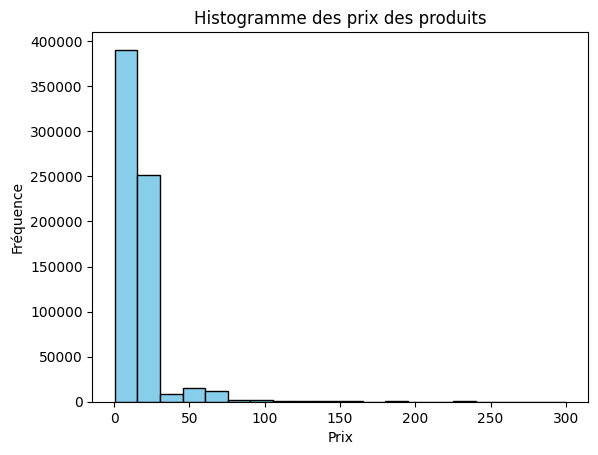

In [59]:
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.title('Histogramme des prix des produits')
plt.show()

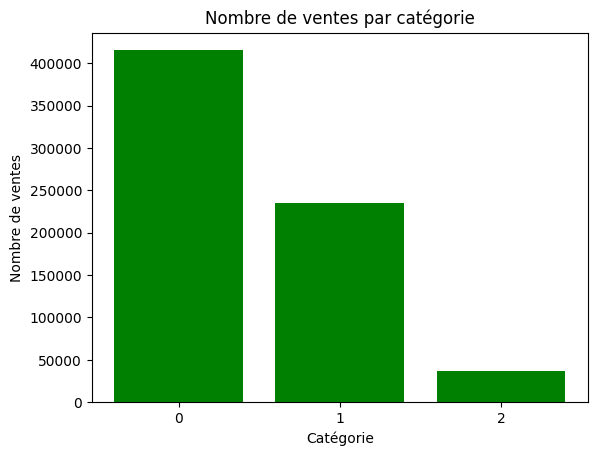

In [62]:
sales_by_category = df.groupby('categ').size()
plt.bar(sales_by_category.index, sales_by_category.values, color='green')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par catégorie')
plt.show()

In [63]:
df['categ'].value_counts()

categ
0    415459
1    235592
2     36483
Name: count, dtype: int64

In [67]:
# Calcul du prix moyen par catégorie
prix_moyen_par_categorie = df.groupby('categ')['price'].mean()

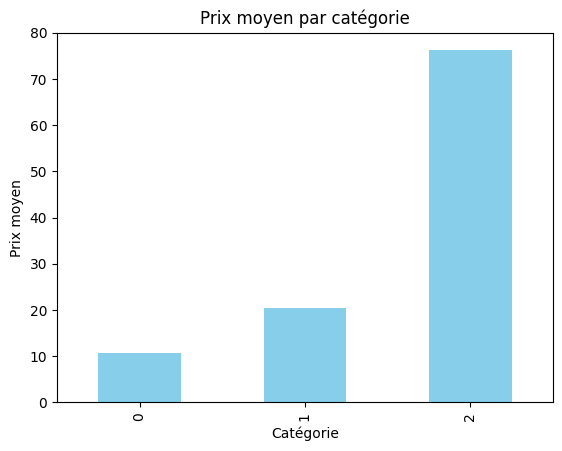

In [68]:
# Diagramme en barres pour le prix moyen par catégorie
prix_moyen_par_categorie.plot(kind='bar', color='skyblue')
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen')
plt.title('Prix moyen par catégorie')
plt.show()

## RFM

In [75]:
# Création d'une table rfm

rfm = df.groupby('client_id').agg(
    {
        'date' : lambda x: (today - x.max()).days, # Calcul du nombre de jours entre la date d'aujourd'hui et la date de la dernière commande par clients
        'client_id' : 'count',
        'price' : 'sum',
        }
    ).rename(columns={
            'date' : 'Recency',
            'client_id' : 'Frequency',
            'price' : 'Monetary',
        }
    ).reset_index()

In [76]:
rfm

,client_id,Recency,Frequency,Monetary
0,c_1,500,43,629.02
1,c_10,488,58,1353.60
2,c_100,617,8,254.85
3,c_1000,491,126,2291.88
4,c_1001,461,103,1823.85
...,...,...,...,...
8595,c_995,555,14,189.41
8596,c_996,463,96,1637.34
8597,c_997,479,59,1490.01
8598,c_998,462,55,2822.22


In [82]:
rfm.describe()

,Recency,Frequency,Monetary
count,8600.000000,8600.000000,8600.000000
mean,494.219535,79.945814,1398.565477
std,65.403644,313.532311,5202.771679
min,456.000000,1.000000,6.310000
25%,462.000000,28.000000,562.730000
50%,472.000000,52.000000,1045.695000
75%,497.000000,97.000000,1797.720000
max,1177.000000,25586.000000,326039.890000


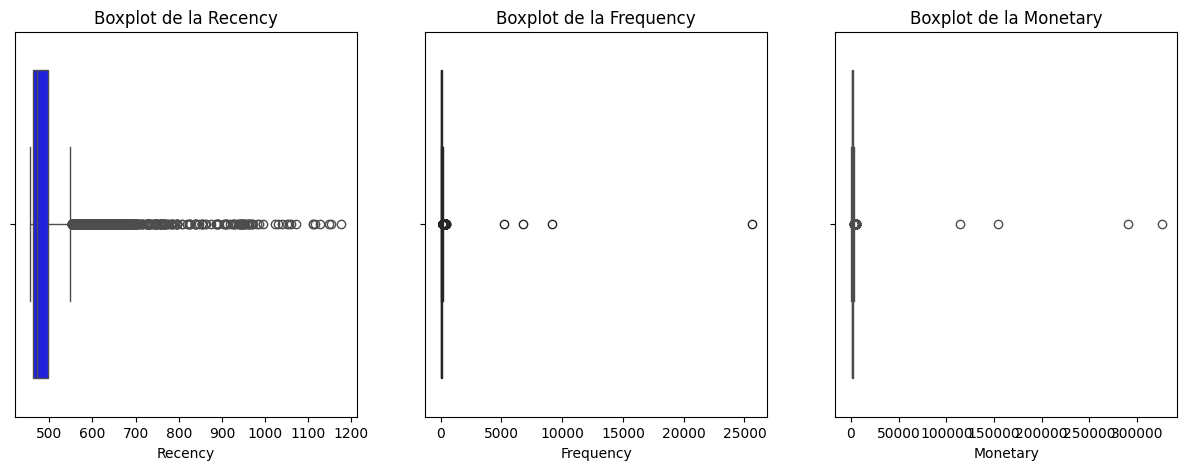

In [86]:
# boxplots RFM
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=rfm['Recency'], ax=axs[0], color='blue')
axs[0].set_title('Boxplot de la Recency')

sns.boxplot(x=rfm['Frequency'], ax=axs[1], color='green')
axs[1].set_title('Boxplot de la Frequency')

sns.boxplot(x=rfm['Monetary'], ax=axs[2], color='red')
axs[2].set_title('Boxplot de la Monetary')

plt.show()

### Vizualisations

In [95]:
recency_bins = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350]
frequency_bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
monetary_bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]

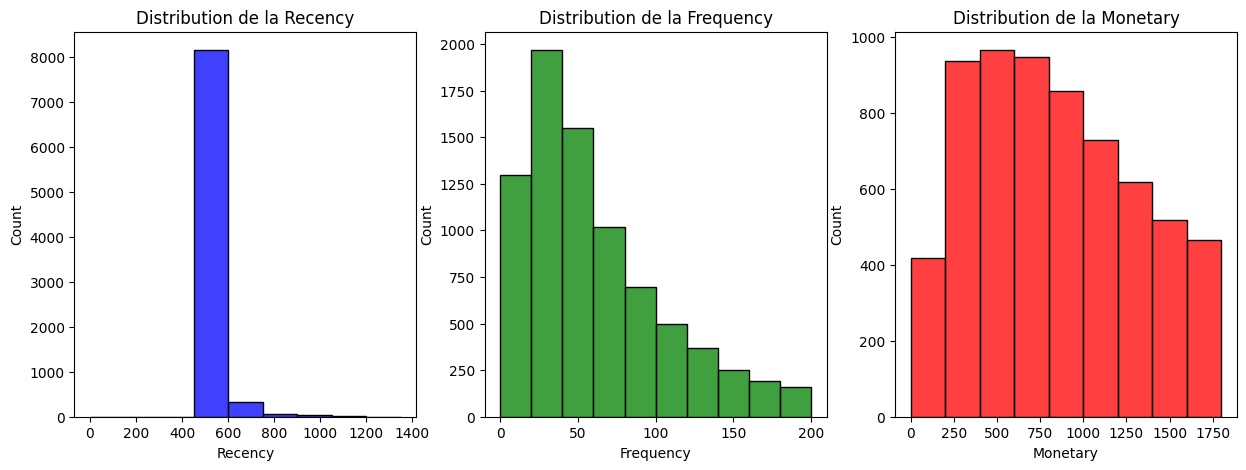

In [96]:
# Diagrammes de distributions
figs, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(
    rfm['Recency'],
    ax=axs[0],
    color='blue',
    bins=recency_bins,
)
axs[0].set_title('Distribution de la Recency')

sns.histplot(
    rfm['Frequency'],
    ax=axs[1],
    color='green',
    bins=frequency_bins,
)
axs[1].set_title('Distribution de la Frequency')

sns.histplot(
    rfm['Monetary'],
    ax=axs[2],
    color='red',
    bins=monetary_bins,
)
axs[2].set_title('Distribution de la Monetary')

plt.show()


## Pour commit test